In [119]:
import pandas as pd 
import numpy as np 
df = pd.read_csv("pokemonGO.csv") 
df.head() 

,Pokemon No.,Name,Type 1,Type 2,MaxCP,MaxHP,Image URL
0,1,Bulbasaur,Grass,Poison,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,2,Ivysaur,Grass,Poison,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,3,Venusaur,Grass,Poison,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,4,Charmander,Fire,NaN,962,73,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,5,Charmeleon,Fire,NaN,1568,103,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...


Характеристики датасета

In [120]:
df.shape # размерность


(151, 7)

In [121]:
df.info() # покажет информацию о размерности данных 
          # описание индекса, количество not-a-number элементов 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pokemon No.  151 non-null    int64 
 1   Name         151 non-null    object
 2   Type 1       151 non-null    object
 3   Type 2       67 non-null     object
 4   MaxCP        151 non-null    int64 
 5   MaxHP        151 non-null    int64 
 6   Image URL    151 non-null    object
dtypes: int64(3), object(4)
memory usage: 8.4+ KB


<AxesSubplot: >

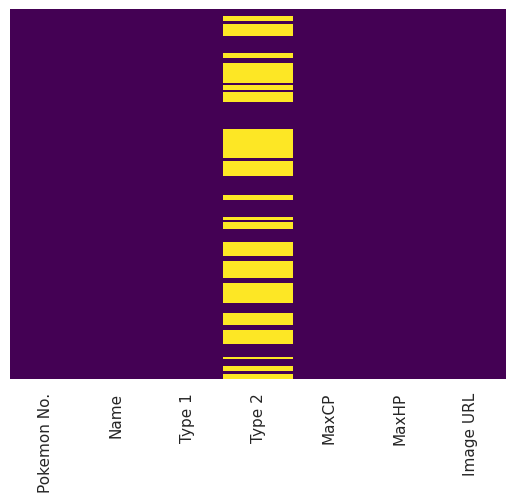

In [122]:
#визуализация отсутствия значений
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [123]:
df.describe() # показывает статистики count,mean, std, min, 25%-50%-75% percentile, max
              # только для числовых значений


,Pokemon No.,MaxCP,MaxHP
count,151.000000,151.000000,151.000000
mean,76.000000,1637.291391,113.350993
std,43.734045,755.261726,45.297417
min,1.000000,264.000000,27.000000
25%,38.500000,1001.500000,83.000000
50%,76.000000,1594.000000,107.000000
75%,113.500000,2170.500000,138.000000
max,151.000000,4174.000000,408.000000


In [124]:
df.nunique() # количество уникальных значений для каждого столбца 

Pokemon No.    151
Name           151
Type 1          15
Type 2          11
MaxCP          150
MaxHP           42
Image URL      151
dtype: int64

In [125]:
#количество каждого уникального значения для каждого столбца в наборе данных
feature_names = df.columns.tolist() 
for column in feature_names: 
    print(column) 
    print("----------------------------------")
    print(df[column].value_counts(dropna=False)) 
    print("==================================")

Pokemon No.
----------------------------------
1      1
96     1
98     1
99     1
100    1
      ..
52     1
53     1
54     1
55     1
151    1
Name: Pokemon No., Length: 151, dtype: int64
Name
----------------------------------
Bulbasaur    1
Drowzee      1
Krabby       1
Kingler      1
Voltorb      1
            ..
Meowth       1
Persian      1
Psyduck      1
Golduck      1
Mew          1
Name: Name, Length: 151, dtype: int64
Type 1
----------------------------------
Water       28
Normal      22
Poison      14
Grass       12
Fire        12
Bug         12
Electric     9
Rock         9
Ground       8
Psychic      8
Fighting     7
Ghost        3
Dragon       3
Fairy        2
Ice          2
Name: Type 1, dtype: int64
Type 2
----------------------------------
NaN         84
Poison      19
Flying      19
Ground       6
Psychic      6
Water        4
Fairy        3
Ice          3
Grass        2
Steel        2
Rock         2
Fighting     1
Name: Type 2, dtype: int64
MaxCP
-----------------

## Выделение целевой переменной

In [126]:
features = df.drop('MaxCP',1) 
labels = df['MaxCP'] 
print(features.head())

   Pokemon No.        Name Type 1  Type 2  MaxHP  \
0            1   Bulbasaur  Grass  Poison     83   
1            2     Ivysaur  Grass  Poison    107   
2            3    Venusaur  Grass  Poison    138   
3            4  Charmander   Fire     NaN     73   
4            5  Charmeleon   Fire     NaN    103   

                                           Image URL  
0  http://cdn.bulbagarden.net/upload/thumb/2/21/0...  
1  http://cdn.bulbagarden.net/upload/thumb/7/73/0...  
2  http://cdn.bulbagarden.net/upload/thumb/a/ae/0...  
3  http://cdn.bulbagarden.net/upload/thumb/7/73/0...  
4  http://cdn.bulbagarden.net/upload/thumb/4/4a/0...  


/tmp/ipykernel_3119/3852086856.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = df.drop('MaxCP',1)


## Чистка датасета 

### Обработка пропусков данных

In [141]:
for row in df.itertuples():
    #print(type(row[4]))
    #print(f"{type(row[4])} - {row[4]} - {pd.isna(row[4])}")
    if pd.isna(row[4]):
        df.at[row.Index, "Type 2"] = row[3]
    print(row[4])

nan
nan
nan
3.0
3.0
nan
nan
nan
nan
4.0
4.0
nan
nan
nan
nan
nan
nan
nan
1.0
1.0
nan
nan
nan
nan
5.0
5.0
7.0
7.0
nan
nan
7.0
nan
nan
7.0
11.0
11.0
3.0
3.0
11.0
11.0
nan
nan
nan
nan
nan
2.0
2.0
nan
nan
7.0
7.0
1.0
1.0
nan
nan
nan
nan
3.0
3.0
nan
nan
nan
8.0
8.0
8.0
nan
nan
nan
nan
nan
nan
nan
nan
7.0
7.0
7.0
3.0
3.0
8.0
8.0
nan
nan
nan
nan
nan
nan
12.0
nan
nan
nan
12.0
nan
nan
nan
7.0
8.0
8.0
nan
nan
5.0
5.0
8.0
8.0
7.0
7.0
nan
nan
1.0
nan
nan
6.0
6.0
1.0
2.0
1.0
nan
nan
nan
nan
nan
8.0
11.0
nan
8.0
5.0
3.0
4.0
1.0
nan
nan
12.0
1.0
1.0
nan
5.0
3.0
1.0
nan
nan
nan
nan
nan
1.0
nan
nan
nan
10.0
10.0
nan
8.0
8.0


In [128]:
type(row[4])
#row[4].value ()

float

<AxesSubplot: >

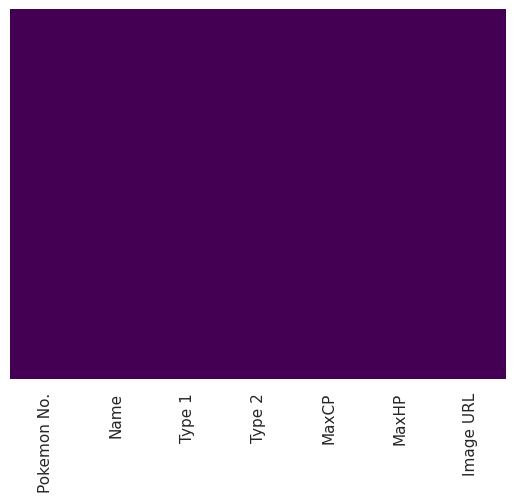

In [129]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Обнаружение выбросов

Для Age существуют значения, которые кажутся ошибочными. Такие как отрицательный возраст или чрезвычайно большие целые числа, могут негативно повлиять на результат работы алгоритма машинного обучения, и нам нужно будет их устранить.
Для этого возьмем эвристическую оценку, в каком возрасте могут работать люди: от 14 до 100 лет. 

/tmp/ipykernel_3119/294848177.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(features.MaxHP.dropna())


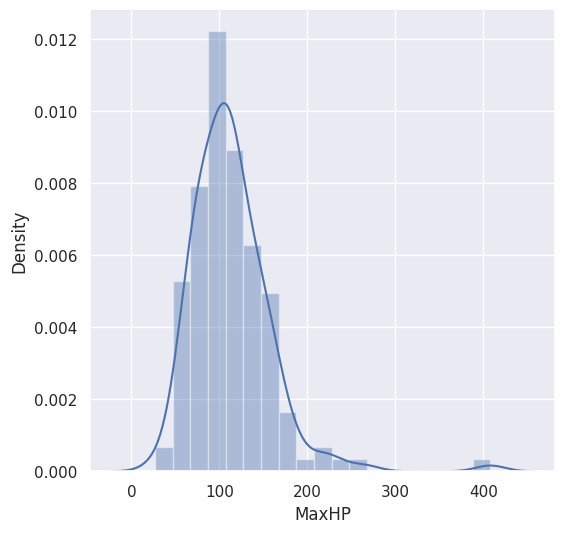

In [130]:
#визуализация распределения возраста
%matplotlib inline   
import seaborn as sns 
sns.set(color_codes=True) 
plot = sns.distplot(features.MaxHP.dropna()) 
plot.figure.set_size_inches(6,6) # в дюймах

/tmp/ipykernel_3119/294848177.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(features.MaxHP.dropna())


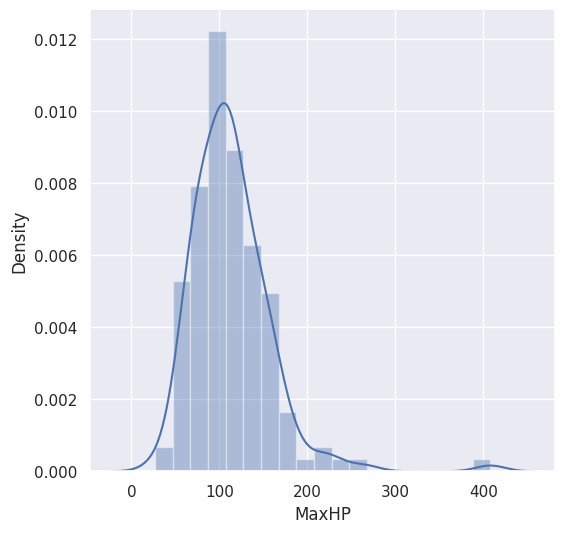

In [131]:
#визуализация распределения возраста
%matplotlib inline   
import seaborn as sns 
sns.set(color_codes=True) 
plot = sns.distplot(features.MaxHP.dropna()) 
plot.figure.set_size_inches(6,6) # в дюймах

In [132]:
#обработка nan значений, замена их на среднее значение по столбцу
features['MaxHP'] = features['MaxHP'].fillna(features['MaxHP'].mean())
print(features.isnull().sum()['MaxHP'])


0


### Кодирование данныx

In [134]:
features['Type 1'].value_counts(dropna=False) 

Water       28
Normal      22
Poison      14
Grass       12
Fire        12
Bug         12
Electric     9
Rock         9
Ground       8
Psychic      8
Fighting     7
Ghost        3
Dragon       3
Fairy        2
Ice          2
Name: Type 1, dtype: int64

In [135]:
#ручное кодирование данных
df['Type 2'] = df['Type 2'].map({'Water ': 0, 
                               'Normal': 1, 
                               'Grass': 2, 
                               'Fire': 3,
                               'Bug': 4,
                               'Electric': 5,
                               'Rock': 6,
                               'Ground': 7,
                               'Psychic': 8,
                               'Ghost': 9,
                               'Dragon': 10,
                               'Fairy': 11,
                               'Ice': 12}) 

In [136]:
#автоматическое кодирование 
#Проблема с этим подходом заключается в том, что вводится порядок, который может отсутствовать в исходных данных. 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(features['Type 1']) 
label_encoder.transform(features['Type 1']) 


array([ 7,  7,  7,  5,  5,  5, 14, 14, 14,  0,  0,  0,  0,  0,  0, 10, 10,
       10, 10, 10, 10, 10, 11, 11,  2,  2,  8,  8, 11, 11, 11, 11, 11, 11,
        3,  3,  5,  5, 10, 10, 11, 11,  7,  7,  7,  0,  0,  0,  0,  8,  8,
       10, 10, 14, 14,  4,  4,  5,  5, 14, 14, 14, 12, 12, 12,  4,  4,  4,
        7,  7,  7, 14, 14, 13, 13, 13,  5,  5, 14, 14,  2,  2, 10, 10, 10,
       14, 14, 11, 11, 14, 14,  6,  6,  6, 13, 12, 12, 14, 14,  2,  2,  7,
        7,  8,  8,  4,  4, 10, 11, 11,  8,  8, 10,  7, 10, 14, 14, 14, 14,
       14, 14, 12,  0,  9,  2,  5,  0, 10, 14, 14, 14, 10, 10, 14,  2,  5,
       10, 13, 13, 13, 13, 13, 10,  9,  2,  5,  1,  1,  1, 12, 12])

Для кодирования номинальных данных используется метод one-hot-encoding. Создается столбец для каждого значения и используется 1 и 0 для обозначения выражения каждого значения. Эти новые столбцы часто называются фиктивными переменными.

In [137]:
#автоматическое кодирование
pd.get_dummies(features['Type 1']) 

,Bug,Dragon,Electric,Fairy,Fighting,Fire,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Water
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
148,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Нормализация данных

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

**Нормализация на стандартное отклонение (StandartScaler)** - используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1.

**Нормализация Min-max** устанавливает наименьшее наблюдаемое значение равным 0, а наибольшее наблюдаемое значение — 1.


In [138]:
#нормализация на стандартное отклонение 
from sklearn.preprocessing import StandardScaler 
scale_features_std = StandardScaler() 
features[['MaxHP']]=scale_features_std.fit_transform(features[['MaxHP']]) 
print(features.head())

   Pokemon No.        Name Type 1  Type 2     MaxHP  \
0            1   Bulbasaur  Grass  Poison -0.672268   
1            2     Ivysaur  Grass  Poison -0.140673   
2            3    Venusaur  Grass  Poison  0.545970   
3            4  Charmander   Fire     NaN -0.893766   
4            5  Charmeleon   Fire     NaN -0.229272   

                                           Image URL  
0  http://cdn.bulbagarden.net/upload/thumb/2/21/0...  
1  http://cdn.bulbagarden.net/upload/thumb/7/73/0...  
2  http://cdn.bulbagarden.net/upload/thumb/a/ae/0...  
3  http://cdn.bulbagarden.net/upload/thumb/7/73/0...  
4  http://cdn.bulbagarden.net/upload/thumb/4/4a/0...  


In [139]:
#нормализация Min-max
features["MaxHP"] = df["MaxHP"]
features['MaxHP'] = features['MaxHP'].fillna(features['MaxHP'].mean())
print(features.head())

from sklearn.preprocessing import MinMaxScaler 
scale_features_mm = MinMaxScaler() 
features[["MaxHP"]] = scale_features_mm.fit_transform(features[["MaxHP"]]) 
print(features.head())

   Pokemon No.        Name Type 1  Type 2  MaxHP  \
0            1   Bulbasaur  Grass  Poison     83   
1            2     Ivysaur  Grass  Poison    107   
2            3    Venusaur  Grass  Poison    138   
3            4  Charmander   Fire     NaN     73   
4            5  Charmeleon   Fire     NaN    103   

                                           Image URL  
0  http://cdn.bulbagarden.net/upload/thumb/2/21/0...  
1  http://cdn.bulbagarden.net/upload/thumb/7/73/0...  
2  http://cdn.bulbagarden.net/upload/thumb/a/ae/0...  
3  http://cdn.bulbagarden.net/upload/thumb/7/73/0...  
4  http://cdn.bulbagarden.net/upload/thumb/4/4a/0...  
   Pokemon No.        Name Type 1  Type 2     MaxHP  \
0            1   Bulbasaur  Grass  Poison  0.146982   
1            2     Ivysaur  Grass  Poison  0.209974   
2            3    Venusaur  Grass  Poison  0.291339   
3            4  Charmander   Fire     NaN  0.120735   
4            5  Charmeleon   Fire     NaN  0.199475   

                          

### Разделение данных для обучения и тестирования
Разделение данных на обучающую и тестовую выборку. Выделение тестовой выборки необходимо для понимания того, что модель обучена в достаточной степени (не произошло переобучение или недообучение)

In [140]:
from sklearn.model_selection import train_test_split 

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state = 0) 

print(features.shape)
print(features_train.shape)
print(features_test.shape)

(151, 6)
(120, 6)
(31, 6)
